# Imports & Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# --- LIBRERIAS ---
import pandas as pd
!pip -q install pyreadstat
import pyreadstat
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.4/666.4 kB 8.8 MB/s eta 0:00:00


In [ ]:
# --- IMPORTS ---
# rutas de bases
indiv_dir_2005 = Path("/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos/EPH_usu_1er_Trim_2005_dta")
hogar_dir_2005 = Path("/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos/EPH_usu_1er_Trim_2005_dta")
hogar_dir_2025 = Path("/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos/EPH_usu_1er_Trim_2025_xlsx")
indiv_dir_2025 = Path("/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos/EPH_usu_1er_Trim_2025_xlsx")

# archivos
indiv_file_2005 = indiv_dir_2005 / "Individual_t105.dta"
hogar_file_2005 = hogar_dir_2005 / "Hogar_t105.dta"
hogar_file_2025 = hogar_dir_2025 / "usu_hogar_T125.xlsx"
indiv_file_2025 = indiv_dir_2025 / "usu_individual_T125.xlsx"

# imports
indiv_2005, meta_2005 = pyreadstat.read_dta(str(indiv_file_2005))
hogar_2005, meta_hogar_2005 = pyreadstat.read_dta(str(hogar_file_2005))
hogar_2025 = pd.read_excel(hogar_file_2025)
indiv_2025  = pd.read_excel(indiv_file_2025)

# chequeos
# indiv_2005
#print("Dimensiones:", indiv_2005.shape)
#print("Columnas (primeras 10):", indiv_2005.columns[:10].tolist())
#indiv_2005.head()

# hogar_2005
#print("Dimensiones:", hogar_2005.shape)
#print("Columnas (primeras 10):", hogar_2005.columns[:10].tolist())
#hogar_2005.head()

# hogar_2025
#print("Dimensiones:", hogar_2025.shape)
#hogar_2025.head()

# indiv_2025
#print("Dimensiones:", indiv_2025.shape)
#indiv_2025.head()
#print(indiv_2025.columns.tolist())

# Filtrado y Union de Bases

Estandarizacion de nombres de columnas

In [ ]:
# --- ESTANDARIZACION DE COLUMNAS SELECCIONADAS ---
# pasar a MAYUSCULAS los nombres de columnas
hogar_2005.columns = hogar_2005.columns.str.upper()
hogar_2025.columns = hogar_2025.columns.str.upper()
indiv_2005.columns = indiv_2005.columns.str.upper()
indiv_2025.columns = indiv_2025.columns.str.upper()

# limpia borde de espacios
hogar_2005.columns = hogar_2005.columns.str.strip()
hogar_2025.columns = hogar_2025.columns.str.strip()
indiv_2005.columns = indiv_2005.columns.str.strip()
indiv_2025.columns = indiv_2025.columns.str.strip()

# chequeamos que la var region se llame igual en ambos años
print(hogar_2005["REGION"].unique())
print(hogar_2025["REGION"].unique())

[43. 41. 44. 42. 40.  1.]
[42 43 40 44  1 41]


Filtrado

In [ ]:
# Personas: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF, CAT_OCUP
# Hogar: IV12_3, IV2, II7, IX Tot, IX_Men10, V19_B

# --- FILTROS HOGAR ---
filtro_hogar_2005 = hogar_2005.loc[
    hogar_2005["REGION"] == 1,
    ["CODUSU", "NRO_HOGAR", "REGION", "IV12_3", "IV2", "II7", "IX_TOT", "IX_MEN10", "V19_B"]
]

filtro_hogar_2025 = hogar_2025.loc[
    hogar_2025["REGION"] == 1,
    ["CODUSU", "NRO_HOGAR", "REGION", "IV12_3", "IV2", "II7", "IX_TOT", "IX_MEN10", "V19_B"]
]

# --- FILTROS INDIVIDUAL ---
filtro_indiv_2005 = indiv_2005.loc[
    indiv_2005["REGION"] == 1,
    ["CODUSU", "NRO_HOGAR", "COMPONENTE", "REGION", "CH04", "CH06", "CH07", "CH08",
     "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF", "CAT_OCUP"]
]

filtro_indiv_2025 = indiv_2025.loc[
    indiv_2025["REGION"] == 1,
    ["CODUSU", "NRO_HOGAR", "COMPONENTE", "REGION", "CH04", "CH06", "CH07", "CH08",
     "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF", "CAT_OCUP"]
]

# --- CHEQUEO ---
print("Hogar 2005:", filtro_hogar_2005.shape)
print("Hogar 2025:", filtro_hogar_2025.shape)
print("Indiv 2005:", filtro_indiv_2005.shape)
print("Indiv 2025:", filtro_indiv_2025.shape)

Hogar 2005: (2943, 9)
Hogar 2025: (2609, 9)
Indiv 2005: (9484, 13)
Indiv 2025: (7181, 13)


Tabla exploratoria

In [ ]:
# definimos una funcion para obtener una tabla exploratoria
def listar_columnas(df: pd.DataFrame) -> pd.DataFrame:
    """Devuelve un resumen de las columnas de un DataFrame:
    nombre, dtype, nulos, % nulos y cantidad de valores únicos
    """
    resumen = pd.DataFrame({
        "columna": df.columns,
        "dtype": df.dtypes.values,
        "nulos": df.isna().sum().values,
        "%_nulos": (df.isna().mean().values * 100).round(2),
        "valores_unicos": df.nunique().values
    })
    return resumen.sort_values(by="%_nulos", ascending=False).reset_index(drop=True)

# vista
listar_columnas(filtro_indiv_2005) #<-- cambiar por la base que se quiera visualizar


,columna,dtype,nulos,%_nulos,valores_unicos
0,CODUSU,object,0,0.0,2906
1,NRO_HOGAR,float64,0,0.0,3
2,COMPONENTE,float64,0,0.0,16
3,REGION,float64,0,0.0,1
4,CH04,float64,0,0.0,2
5,CH06,float64,0,0.0,96
6,CH07,float64,0,0.0,6
7,CH08,float64,0,0.0,7
8,NIVEL_ED,float64,0,0.0,7
9,ESTADO,float64,0,0.0,5


Estandarizacion de formato

In [ ]:
# --- ESTANDARIZACION DE FORMATO DE COLUMNAS SELECCIONADAS ---
# hogar 2025 - 2005
# CODUSU - OBJECT
# NRO_HOGAR - INT / FLOAT
# REGION - INT / FLOAT
# IV12_3 - INT / FLOAT
# IV2 - INT / FLOAT
# II7 - INT / FLOAT
# V19_B - INT / FLOAT
# IX_TOT - INT / FLOAT
# IX_MEN10 - INT / FLOAT

# indiv 2025 - 2005
# CODUSU - OBJECT
# NRO_HOGAR - INT / FLOAT
# COMPONENTE - INT / FLOAT
# REGION - INT / FLOAT
# CH04 - INT / FLOAT
# CH06 - INT / FLOAT
# CH07 - INT / FLOAT
# CH08 - FLOAT / FLOAT
# NIVEL_ED - INT / FLOAT
# ESTADO - INT / FLOAT
# CAT_INAC - INT / FLOAT
# IPCF - FLOAT / FLOAT
# CAT_OCUP - INT / FLOAT

# definimos una funcion para asegurarnos que no perdemos datos transformando de FLOAT a INT64
def safe_float_to_int(df, columnas):
    """Devuelve un diagnostico de las columnas de un DataFrame:
      si se puede convertir a INT64 sin perdida, si contiene
      numeros con decimales o si no es FLOAT
    """
    for col in columnas:
        if col in df.columns:
            if pd.api.types.is_float_dtype(df[col]):
                if df[col].dropna().apply(float.is_integer).all():
                    df[col] = df[col].astype('Int64')  # Soporta NaNs
                    print(f"✔ Columna '{col}' convertida a Int64 sin pérdida.")
                else:
                    print(f"⚠ Columna '{col}' contiene valores no enteros. No convertida.")
            else:
                print(f"ℹ Columna '{col}' no es float. Tipo: {df[col].dtype}")
    return df

In [ ]:
columnas_hogar = ['NRO_HOGAR', 'REGION', 'IV12_3', 'IV2', 'II7', 'V19_B', 'IX_TOT', 'IX_MEN10']
filtro_hogar_2025 = safe_float_to_int(filtro_hogar_2025, columnas_hogar)

ℹ Columna 'NRO_HOGAR' no es float. Tipo: int64
ℹ Columna 'REGION' no es float. Tipo: int64
ℹ Columna 'IV12_3' no es float. Tipo: int64
ℹ Columna 'IV2' no es float. Tipo: int64
ℹ Columna 'II7' no es float. Tipo: int64
ℹ Columna 'V19_B' no es float. Tipo: int64
ℹ Columna 'IX_TOT' no es float. Tipo: int64
ℹ Columna 'IX_MEN10' no es float. Tipo: int64


In [ ]:
columnas_indiv = ['NRO_HOGAR', 'COMPONENTE', 'REGION', 'CH04', 'CH06', 'CH07', 'CH08',
                  'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'CAT_OCUP']
filtro_indiv_2025 = safe_float_to_int(filtro_indiv_2025, columnas_indiv)

ℹ Columna 'NRO_HOGAR' no es float. Tipo: int64
ℹ Columna 'COMPONENTE' no es float. Tipo: int64
ℹ Columna 'REGION' no es float. Tipo: int64
ℹ Columna 'CH04' no es float. Tipo: int64
ℹ Columna 'CH06' no es float. Tipo: int64
ℹ Columna 'CH07' no es float. Tipo: int64
✔ Columna 'CH08' convertida a Int64 sin pérdida.
ℹ Columna 'NIVEL_ED' no es float. Tipo: int64
ℹ Columna 'ESTADO' no es float. Tipo: int64
ℹ Columna 'CAT_INAC' no es float. Tipo: int64
⚠ Columna 'IPCF' contiene valores no enteros. No convertida.
ℹ Columna 'CAT_OCUP' no es float. Tipo: int64


In [ ]:
columnas_hogar = ['NRO_HOGAR', 'REGION', 'IV12_3', 'IV2', 'II7', 'V19_B', 'IX_TOT', 'IX_MEN10']
filtro_hogar_2005 = safe_float_to_int(filtro_hogar_2005, columnas_hogar)

✔ Columna 'NRO_HOGAR' convertida a Int64 sin pérdida.
✔ Columna 'REGION' convertida a Int64 sin pérdida.
✔ Columna 'IV12_3' convertida a Int64 sin pérdida.
✔ Columna 'IV2' convertida a Int64 sin pérdida.
✔ Columna 'II7' convertida a Int64 sin pérdida.
✔ Columna 'V19_B' convertida a Int64 sin pérdida.
✔ Columna 'IX_TOT' convertida a Int64 sin pérdida.
✔ Columna 'IX_MEN10' convertida a Int64 sin pérdida.


In [ ]:
columnas_indiv = ['NRO_HOGAR', 'COMPONENTE', 'REGION', 'CH04', 'CH06', 'CH07', 'CH08',
                  'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'CAT_OCUP']
filtro_indiv_2005 = safe_float_to_int(filtro_indiv_2005, columnas_indiv)

✔ Columna 'NRO_HOGAR' convertida a Int64 sin pérdida.
✔ Columna 'COMPONENTE' convertida a Int64 sin pérdida.
✔ Columna 'REGION' convertida a Int64 sin pérdida.
✔ Columna 'CH04' convertida a Int64 sin pérdida.
✔ Columna 'CH06' convertida a Int64 sin pérdida.
✔ Columna 'CH07' convertida a Int64 sin pérdida.
✔ Columna 'CH08' convertida a Int64 sin pérdida.
✔ Columna 'NIVEL_ED' convertida a Int64 sin pérdida.
✔ Columna 'ESTADO' convertida a Int64 sin pérdida.
✔ Columna 'CAT_INAC' convertida a Int64 sin pérdida.
⚠ Columna 'IPCF' contiene valores no enteros. No convertida.
✔ Columna 'CAT_OCUP' convertida a Int64 sin pérdida.


In [ ]:
# chequeamos que haya cambiado el formato a las col
listar_columnas(filtro_indiv_2025)

,columna,dtype,nulos,%_nulos,valores_unicos
0,CODUSU,object,0,0.0,2608
1,NRO_HOGAR,int64,0,0.0,4
2,COMPONENTE,int64,0,0.0,13
3,REGION,int64,0,0.0,1
4,CH04,int64,0,0.0,2
5,CH06,int64,0,0.0,100
6,CH07,int64,0,0.0,5
7,CH08,Int64,0,0.0,6
8,NIVEL_ED,int64,0,0.0,7
9,ESTADO,int64,0,0.0,5


Combinacion

In [ ]:
# añadimos columna ANIO por si es necesaria luego
filtro_indiv_2025['ANIO'] = 2025
filtro_hogar_2025['ANIO'] = 2025
filtro_indiv_2005['ANIO'] = 2005
filtro_hogar_2005['ANIO'] = 2005

# unimos hogares e individuos por año
df_2025 = pd.merge(filtro_indiv_2025, filtro_hogar_2025, on=['ANIO', 'CODUSU', 'NRO_HOGAR'], how='left', suffixes=('', '_HOGAR')) #si hay una col que se repita, marcala como _HOGAR
df_2005 = pd.merge(filtro_indiv_2005, filtro_hogar_2005, on=['ANIO', 'CODUSU', 'NRO_HOGAR'], how='left', suffixes=('', '_HOGAR'))

# unimos los dos años
base = pd.concat([df_2025, df_2005], ignore_index=True)

# orden que le quiero dar a las columnas (primero todo lo relacionado a hogar y luego a indiv)
orden_columnas = [
    'ANIO', 'CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'IV12_3', 'IV2', 'II7',
    'V19_B', 'IX_TOT', 'IX_MEN10', 'CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED',
    'ESTADO', 'CAT_INAC', 'IPCF', 'CAT_OCUP'
]

# reordena columnas si existen en el DataFrame combinado
columnas_finales = [col for col in orden_columnas if col in base.columns]
base = base[columnas_finales + [col for col in base.columns if col not in columnas_finales]]

# como hay dos col llamadas igual, REGION, agrega una col al final
# eliminamos la col REGION_HOGAR
base = base.drop(columns=['REGION_HOGAR'], errors='ignore')

base

,ANIO,CODUSU,NRO_HOGAR,COMPONENTE,REGION,IV12_3,IV2,II7,V19_B,IX_TOT,IX_MEN10,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP
0,2025,TQRMNORVYHLNOTCDEIJAH00855496,1,2,1,2,2,6,2,2,0,1,30,5,1,3,1,0,375500.0,3
1,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,1,1,2,3,1,2,5,1,1,82,4,1,1,3,7,251600.0,0
2,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,2,1,2,3,1,2,5,1,1,34,1,4,4,1,0,251600.0,1
3,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,3,1,2,3,1,2,5,1,2,32,1,4,4,3,4,251600.0,0
4,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,4,1,2,3,1,2,5,1,1,10,5,4,1,3,3,251600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,2005,288150,1,2,1,2,2,3,2,2,<NA>,2,73,2,1,2,3,1,297.0,0
16661,2005,288167,1,1,1,2,3,1,2,4,<NA>,1,48,2,1,2,1,0,275.0,3
16662,2005,288167,1,2,1,2,3,1,2,4,<NA>,2,38,2,1,2,1,0,275.0,2
16663,2005,288167,1,3,1,2,3,1,2,4,<NA>,2,18,5,4,4,3,7,275.0,0


In [ ]:
# vista de la base combinada
listar_columnas(base)

,columna,dtype,nulos,%_nulos,valores_unicos
0,IX_MEN10,Int64,5068,30.41,6
1,ANIO,int64,0,0.00,2
2,NRO_HOGAR,Int64,0,0.00,4
3,CODUSU,object,0,0.00,5514
4,COMPONENTE,Int64,0,0.00,16
5,REGION,Int64,0,0.00,1
6,IV2,Int64,0,0.00,14
7,IV12_3,Int64,0,0.00,2
8,II7,Int64,0,0.00,11
9,V19_B,Int64,0,0.00,3


# Figura de Headmap

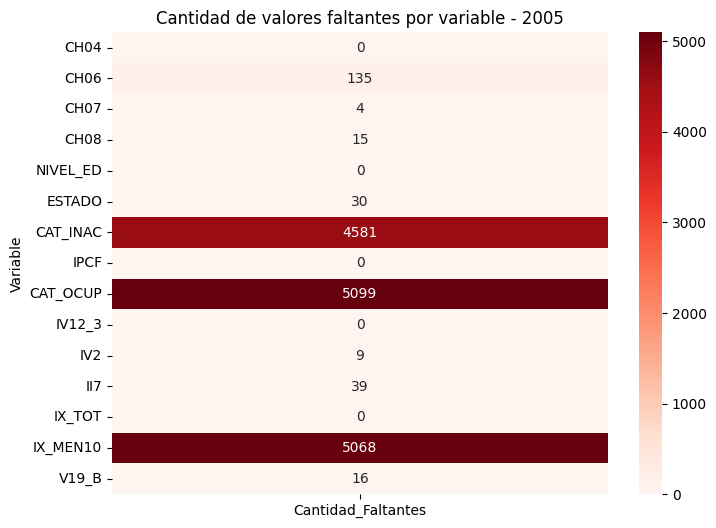

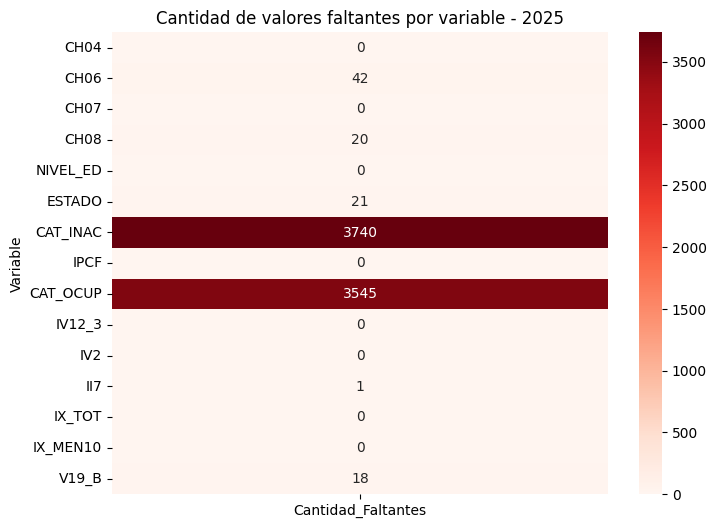

In [ ]:
# Seleccionar las variables de interés
vars_interes = [
    "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO",
    "CAT_INAC", "IPCF", "CAT_OCUP", "IV12_3", "IV2", "II7",
    "IX_TOT", "IX_MEN10", "V19_B"
]

# Heatmap de faltantes por año
def heatmap_faltantes(df, year, vars_faltantes):
  df_year = df[df['ANIO'] == year]

  #Calculo valores nulos
  faltantes = df_year[vars_interes].isna().sum().reset_index()
  faltantes.columns = ["Variable", "Cantidad_Faltantes"]
  faltantes = faltantes.set_index("Variable")

  #Grafico heatmap
  plt.figure(figsize=(8,6))
  sns.heatmap(faltantes,annot=True,cmap="Reds", fmt="d", cbar="False")
  plt.title(f"Cantidad de valores faltantes por variable - {year}")
  plt.ylabel("Variable")
  plt.show()

  return faltantes

#Generar para 2005 y 2025
faltantes_2005 = heatmap_faltantes(base, 2005, vars_interes)
faltantes_2025 = heatmap_faltantes(base, 2025, vars_interes)

# Correccion de valores extraños

In [ ]:
variables_de_interes = [
    'IV12_3', 'IV2', 'II7', 'V19_B', 'IX_TOT', 'IX_MEN10', 'CH04',
    'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF', 'CAT_OCUP'
]

print("--- Exploración de valores por variable y año ---")

for variable in variables_de_interes:
    # Nos enfocamos en las columnas numéricas
    if pd.api.types.is_numeric_dtype(base[variable]):
        print(f"\n--- Análisis de la variable: {variable} ---")
        try:
            # Agrupamos por año y contamos los valores.
            print(base.groupby('ANIO')[variable].value_counts())
        except Exception as e:
            print(f"No se pudo analizar la variable {variable}. Error: {e}")
        print("\n" + "="*50)

--- Exploración de valores por variable y año ---

--- Análisis de la variable: IV12_3 ---
ANIO  IV12_3
2005  2         9286
      1          198
2025  2         7094
      1           87
Name: count, dtype: Int64


--- Análisis de la variable: IV2 ---
ANIO  IV2
2005  3      3746
      4      1979
      2      1951
      1       748
      5       725
      6       190
      7        80
      8        32
      10       18
      99        5
      11        4
      31        4
      12        2
2025  3      2960
      2      1546
      4      1540
      5       495
      1       407
      6       160
      7        52
      8        17
      9         4
Name: count, dtype: Int64


--- Análisis de la variable: II7 ---
ANIO  II7
2005  1      6476
      3      1371
      6       516
      2       509
      4       331
      5       118
      8        80
      7        31
      0        23
      99       16
      9        13
2025  1      4545
      3      1218
      2       583
      6       

In [ ]:
print("--- Proceso de Limpieza del DataFrame ---")

# Reemplazamos los códigos identificados por NaN (valor nulo)

# Código 99 ("Ns/Nr") en la variable de ambientes (IV2)
base['IV2'].replace(99, np.nan, inplace=True)
print("Código 99 reemplazado por NaN en 'IV2'.")

# Valor atípico 31 ambientes en la columna IV2
base['IV2'].replace(31, np.nan, inplace=True)
print("Valor atípico 31 en 'IV2' reemplazado por NaN.")

#Valor extraño en II7 (0,99, No son opciones del diccionario)
base['II7'].replace(0, np.nan, inplace=True)
base['II7'].replace(99, np.nan, inplace=True)

#VAR V19_A (niños piden plata? --> nadie marco opcion 1 (Sí) (((capaz reemplazar)))
base['V19_B'].replace(0, np.nan, inplace=True)
base['V19_B'].replace(9, np.nan, inplace=True)

# Código 9 ("Ns/Nr") en las variables categóricas
base['CH07'].replace(9, np.nan, inplace=True)
base['CH08'].replace(9, np.nan, inplace=True)
base['CAT_OCUP'].replace(9, np.nan, inplace=True)
print("Código 9 reemplazado por NaN en 'CH07', 'CH08' y 'CAT_OCUP'.")

# Código 0 ("No corresponde" o "No realizada")
base['ESTADO'].replace(0, np.nan, inplace=True)
base['CAT_INAC'].replace(0, np.nan, inplace=True)
base['CAT_OCUP'].replace(0, np.nan, inplace=True) # También limpiamos el 0 de CAT_OCUP
print("Código 0 reemplazado por NaN en 'ESTADO', 'CAT_INAC' y 'CAT_OCUP'.")

# Código -1 (edad negativa)
base['CH06'].replace(-1, np.nan, inplace=True)
print("Código -1 reemplazado por NaN en 'CH06'")

print("\n¡Limpieza completada!")

--- Proceso de Limpieza del DataFrame ---
Código 99 reemplazado por NaN en 'IV2'.
Valor atípico 31 en 'IV2' reemplazado por NaN.
Código 9 reemplazado por NaN en 'CH07', 'CH08' y 'CAT_OCUP'.
Código 0 reemplazado por NaN en 'ESTADO', 'CAT_INAC' y 'CAT_OCUP'.
Código -1 reemplazado por NaN en 'CH06'

¡Limpieza completada!


/tmp/ipython-input-3195831134.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['IV2'].replace(99, np.nan, inplace=True)
/tmp/ipython-input-3195831134.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Ejecutamos la función OTRA VEZ, después de la limpieza
resumen_final = listar_columnas(base)

print("\n--- Resumen Final del DataFrame ---")
print(resumen_final)


--- Resumen Final del DataFrame ---
       columna    dtype  nulos  %_nulos  valores_unicos
0     CAT_OCUP    Int64   8644    51.87               4
1     CAT_INAC    Int64   8321    49.93               7
2     IX_MEN10    Int64   5068    30.41               6
3         CH06    Int64    177     1.06              99
4       ESTADO    Int64     51     0.31               4
5          II7    Int64     40     0.24               9
6         CH08    Int64     35     0.21               6
7        V19_B    Int64     34     0.20               1
8          IV2    Int64      9     0.05              12
9         CH07    Int64      4     0.02               5
10        ANIO    int64      0     0.00               2
11   NRO_HOGAR    Int64      0     0.00               4
12      CODUSU   object      0     0.00            5514
13      REGION    Int64      0     0.00               1
14  COMPONENTE    Int64      0     0.00              16
15      IV12_3    Int64      0     0.00               2
16      IX_

# Parte II

--- Tabla de Composición Porcentual por Sexo y Año ---
   ANIO   CH04  conteo  porcentaje
0  2005  Varón    4504   47.490510
1  2005  Mujer    4980   52.509490
2  2025  Varón    3439   47.890266
3  2025  Mujer    3742   52.109734


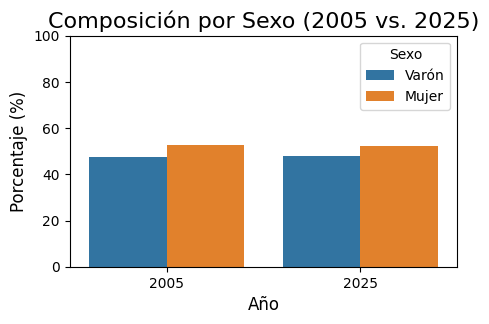

In [ ]:
#3) Realicen un gráfico de barras mostrando la composición por sexo para 2005 y 2025 en su región. Comenten los resultados.

# Prepararamos los Datos para el Gráfico
# Agrupamos por año y sexo (CH04) y contamos la cantidad de personas.
conteo_sexo_por_anio = base.groupby(['ANIO', 'CH04']).size().reset_index(name='conteo')

# Nos aseguramos de que la columna CH04 sea de tipo entero (int)
conteo_sexo_por_anio['CH04'] = conteo_sexo_por_anio['CH04'].astype(int)

# Reemplazamos los códigos de CH04 por etiquetas legibles para el gráfico.
conteo_sexo_por_anio['CH04'] = conteo_sexo_por_anio['CH04'].replace({1: 'Varón', 2: 'Mujer'})

# Calculamos el total de personas por año para poder sacar el porcentaje.
total_por_anio = conteo_sexo_por_anio.groupby('ANIO')['conteo'].transform('sum')

# Creamos una nueva columna con la composición porcentual.
conteo_sexo_por_anio['porcentaje'] = (conteo_sexo_por_anio['conteo'] / total_por_anio) * 100

# Mostramos la tabla resultante para verificar
print("--- Tabla de Composición Porcentual por Sexo y Año ---")
print(conteo_sexo_por_anio)


# Creamos el Gráfico de Barras!! ---->

# Configuramos el tamaño del gráfico
plt.figure(figsize=(5, 3))

# Creamos el gráfico de barras
sns.barplot(
    data=conteo_sexo_por_anio,
    x='ANIO',
    y='porcentaje',
    hue='CH04', # 'hue' crea barras separadas para cada categoría
    palette={'Varón': '#1f77b4', 'Mujer': '#ff7f0e'} # Asignamos colores
)

# Añadimos títulos y etiquetas para que sea fácil de entender
plt.title('Composición por Sexo (2005 vs. 2025)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Sexo')
plt.ylim(0, 100) # Aseguramos que el eje Y vaya de 0 a 100

# Mostramos el gráfico
plt.show()

Al analizar la composición por sexo de la población en la región seleccionada, los resultados de la Encuesta Permanente de Hogares (EPH) para los primeros trimestres de 2005 y 2025 indican una estabilidad en la estructura demográfica.

Como se observa en el gráfico de barras, la distribución entre varones y mujeres se mantiene prácticamente sin cambios significativos entre ambos períodos:

En 2005, la población encuestada se componía de un 52.5% de mujeres y un 47.5% de varones.

En 2025, estas cifras muestran una variación mínima, registrando un 52.1% de mujeres y un 47.9% de varones.

En conclusión, la diferencia de menos de medio punto porcentual en dos décadas sugiere que no han ocurrido cambios demográficos relevantes en la composición por sexo dentro de la región estudiada. La proporción se mantiene cercana a la paridad, con una ligera mayoría femenina consistente en ambos años.

--- Columnas listas para la correlación (Ejemplo 2025): ---
   Edad  IngresoPC  Sexo_Varon  Sexo_Mujer  EstadoCivil_Unido  \
0    30   375500.0        True       False              False   
1    82   251600.0        True       False              False   
2    34   251600.0        True       False               True   
3    32   251600.0       False        True               True   
4    10   251600.0        True       False              False   

   EstadoCivil_Casado  EstadoCivil_Soltero  NivelEd_PrimIncomp  \
0               False                 True               False   
1               False                False                True   
2               False                False               False   
3               False                False               False   
4               False                 True                True   

   NivelEd_PrimComp  NivelEd_SecIncomp  NivelEd_SecComp  NivelEd_SupComp  \
0             False               True            False            False   


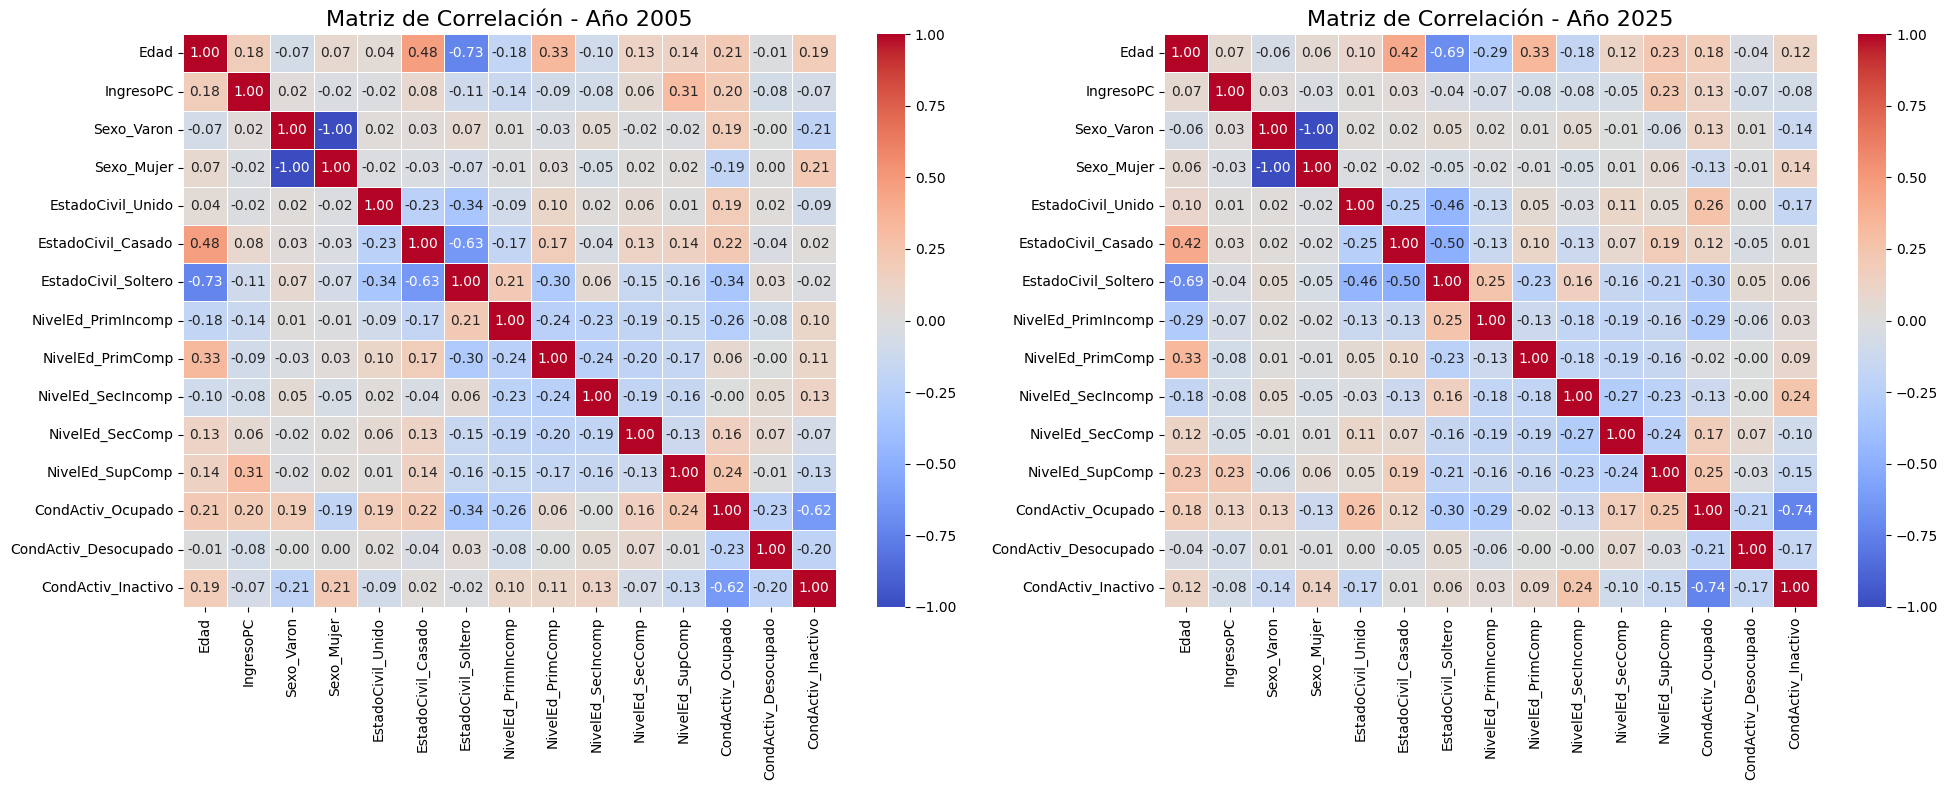

In [ ]:
#Punto 4:
#Realicen una matriz de correlación para 2005 y 2025 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF.
#Crear las variables dicotómicas binarias necesarias (var dummies) y renombrar dichas var para que las etiquetas tengan sentido en el gráfico de correlación.

# Lista de variables para la matriz de correlación
variables_corr = [
    'CH04',     # Sexo
    'CH06',     # Edad
    'CH07',     # Estado civil
    'CH08',     # Cobertura médica
    'NIVEL_ED', # Nivel Educativo
    'ESTADO',   # Condición de actividad
    'CAT_INAC', # Categoría de inactividad
    'IPCF'      # Ingreso Per Cápita Familiar
]

# Creamos un DataFrame para cada año con solo esas variables
df_2005 = base[base['ANIO'] == 2005][variables_corr].copy()
df_2025 = base[base['ANIO'] == 2025][variables_corr].copy()

def procesar_para_correlacion(df):
    """
    Esta función toma un DataFrame, crea variables dummies para las columnas
    categóricas y las renombra para mayor claridad.
    """
    # Variables que ya son numéricas y podemos usar directamente
    df_numerico = df[['CH06', 'IPCF']].copy()
    df_numerico.rename(columns={'CH06': 'Edad', 'IPCF': 'IngresoPC'}, inplace=True)

    # Variables categóricas que convertiremos a dummies
    variables_categoricas = ['CH04', 'CH07', 'NIVEL_ED', 'ESTADO']

    # Creamos las dummies
    df_dummies = pd.get_dummies(df[variables_categoricas].astype(str), columns=variables_categoricas)

    # Diccionario para renombrar las nuevas columnas
    mapa_nombres = {
        'CH04_1': 'Sexo_Varon',
        'CH04_2': 'Sexo_Mujer',
        'CH07_1': 'EstadoCivil_Unido',
        'CH07_2': 'EstadoCivil_Casado',
        'CH07_5': 'EstadoCivil_Soltero',
        'NIVEL_ED_1': 'NivelEd_PrimIncomp',
        'NIVEL_ED_2': 'NivelEd_PrimComp',
        'NIVEL_ED_3': 'NivelEd_SecIncomp',
        'NIVEL_ED_4': 'NivelEd_SecComp',
        'NIVEL_ED_6': 'NivelEd_SupComp',
        'ESTADO_1': 'CondActiv_Ocupado',
        'ESTADO_2': 'CondActiv_Desocupado',
        'ESTADO_3': 'CondActiv_Inactivo'
    }

    df_dummies.rename(columns=mapa_nombres, inplace=True)

    # Unimos las variables numéricas originales con las nuevas dummies
    df_final = pd.concat([df_numerico, df_dummies], axis=1)

    # Seleccionamos solo las columnas renombradas o las que nos interesan
    columnas_finales = [col for col in df_final.columns if col in list(mapa_nombres.values()) + ['Edad', 'IngresoPC']]

    return df_final[columnas_finales]

# Procesamos cada DataFrame
df_2005_corr = procesar_para_correlacion(df_2005)
df_2025_corr = procesar_para_correlacion(df_2025)

# Calculamos la matriz de correlación para cada año
matriz_corr_2005 = df_2005_corr.corr()
matriz_corr_2025 = df_2025_corr.corr()

print("--- Columnas listas para la correlación (Ejemplo 2025): ---")
print(df_2025_corr.head())

# Creamos una figura con dos subplots (uno para cada año)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Matriz de Correlación para 2005
sns.heatmap(matriz_corr_2005, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
axes[0].set_title('Matriz de Correlación - Año 2005', fontsize=16)

# Matriz de Correlación para 2025
sns.heatmap(matriz_corr_2025, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
axes[1].set_title('Matriz de Correlación - Año 2025', fontsize=16)

# Ajustamos el layout y mostramos la figura
plt.tight_layout()
plt.show()


El análisis de las matrices de correlación para 2005 y 2025 revela estabilidad en la mayoría de las relaciones socioeconómicas a lo largo de las dos décadas, sugiriendo que las estructuras subyacentes en la región se han mantenido consistentes. Las matrices confirman la importancia del nivel educativo como un factor clave asociado a mayores ingresos y una mayor probabilidad de estar ocupado.

La educación, en particular, demuestra ser un claro factor asociado al ingreso per cápita familiar (IngresoPC). Se observa una correlación positiva y moderada entre tener Estudios Superiores Completos (NivelEd_SupComp) y un mayor IngresoPC, con un coeficiente de 0.31 en 2005 que se mantuvo en 0.26 en 2025. Inversamente, tener Primario Incompleto (NivelEd_PrimIncomp) muestra una correlación negativa débil pero consistente con el ingreso ( -0.14 en 2005 y -0.13 en 2025), subrayando la persistente relación entre el nivel educativo y el bienestar económico.

Los patrones del ciclo de vida también se reflejan claramente en los datos, especialmente en la relación entre la edad y el estado civil. La correlación más fuerte de toda la matriz se da entre la Edad y ser Soltero (EstadoCivil_Soltero), con un coeficiente fuertemente negativo de -0.71 en 2005 y -0.66 en 2025. Esto indica que, a medida que la edad aumenta, la probabilidad de ser soltero disminuye considerablemente. De forma complementaria, la Edad tiene una correlación positiva moderada con ser Casado (EstadoCivil_Casado) en ambos períodos.

Finalmente, la condición de actividad presenta relaciones lógicas con otras variables. Estar Ocupado (CondActiv_Ocupado) se correlaciona positivamente con el IngresoPC. Un cambio interesante entre los dos años es que la relación entre tener Estudios Superiores Completos y estar Ocupado parece haberse fortalecido, pasando de una correlación de 0.16 en 2005 a una más marcada de 0.25 en 2025, sugiriendo una posible mayor valoración de las credenciales universitarias en el mercado laboral más reciente.

# Parte III: Conociendo a los pobres y no pobres


In [ ]:
# 5) Crear la variable ITF en la base inicial
base["ITF"] = base["IPCF"] * base["IX_TOT"]

# Verificar que se haya agregado
print(base[["IPCF", "IX_TOT", "ITF"]].head())


       IPCF  IX_TOT        ITF
0  375500.0       2   751000.0
1  251600.0       5  1258000.0
2  251600.0       5  1258000.0
3  251600.0       5  1258000.0
4  251600.0       5  1258000.0


In [ ]:
# 1) Separar las bases según ITF
respondieron = base[
    base["ITF"].notna() & (base["ITF"] != 0)
].copy()

norespondieron = base[
    base["ITF"].isna() | (base["ITF"] == 0)
].copy()

print("Respondieron ITF:", respondieron.shape[0])
print("No respondieron ITF:", norespondieron.shape[0])

# 2) Guardamos en drive
save_path = "/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos"
respondieron.to_csv(os.path.join(save_path, "respondieron_itf.csv"), index=False)
norespondieron.to_csv(os.path.join(save_path, "norespondieron_itf.csv"), index=False)

# 3) Conteo por año
resumen_itf = (
    base.assign(RESPONDIO_ITF = base["ITF"].notna() & (base["ITF"] != 0))
        .groupby(["ANIO", "RESPONDIO_ITF"])
        .size()
        .unstack(fill_value=0)
        .rename(columns={False: "No respondieron ITF", True: "Respondieron ITF"})
        .sort_index()
)

print("\nConteo por año (respondieron vs no respondieron):")
print(resumen_itf)


# 4) Distribución de ESTADO entre quienes NO respondieron ITF, por año
estado_por_anio = (
    norespondieron.groupby(["ANIO", "ESTADO"])
        .size()
        .unstack(fill_value=0)
        .sort_index()
)

print("\nDistribución de ESTADO entre no respondieron ITF (por año):")
print(estado_por_anio)

Respondieron ITF: 13680
No respondieron ITF: 2985

Conteo por año (respondieron vs no respondieron):
RESPONDIO_ITF  No respondieron ITF  Respondieron ITF
ANIO                                                
2005                           113              9371
2025                          2872              4309

Distribución de ESTADO entre no respondieron ITF (por año):
ESTADO     1    2     3    4
ANIO                        
2005      17   29    36   20
2025    1475  143  1003  230


In [ ]:
#Cargamos el archivo

Tabla_equiv = Path("/content/drive/Shareddrives/Tp Sociología/Ciencia de Datos")

Tabla_equiv_file = Tabla_equiv / "tabla_adulto_equiv.xlsx"

Tabla_equiv_adult  = pd.read_excel(Tabla_equiv_file)

In [ ]:
valores_0a17_mujeres = {
    0: 0.35,
    1: 0.37,
    2: 0.46,
    3: 0.51,
    4: 0.55,
    5: 0.60,
    6: 0.64,
    7: 0.66,
    8: 0.68,
    9: 0.69,
    10: 0.70,
    11: 0.72,
    12: 0.74,
    13: 0.76,
    14: 0.77,
    15: 0.77,
    16: 0.77,
    17: 0.77
}

In [ ]:
valores_0a17_hombres = {
    0: 0.35,
    1: 0.37,
    2: 0.46,
    3: 0.51,
    4: 0.55,
    5: 0.60,
    6: 0.64,
    7: 0.66,
    8: 0.68,
    9: 0.69,
    10: 0.79,
    11: 0.82,
    12: 0.85,
    13: 0.90,
    14: 0.96,
    15: 1.00,
    16: 1.03,
    17: 1.04
}

In [ ]:
# Valores para rangos
rangos_hombres = {
    "18-29": 1.02,
    "30-45": 1.00,
    "46-60": 1.00,
    "61-75": 0.83,
    "75+": 0.74
}

rangos_mujeres = {
    "18-29": 0.76,
    "30-45": 0.77,
    "46-60": 0.76,
    "61-75": 0.67,
    "75+": 0.63
}

adulto_equiv

In [ ]:
def asignar_valor(fila):
    edad = fila["CH06"]
    sexo = fila["CH04"]  # 1=hombre, 2=mujer

    # Handle missing values
    if pd.isna(edad) or pd.isna(sexo):
        return None

    # Case 0 to 17 (dictionary)
    if 0 <= edad <= 17:
        if sexo == 1:
            return valores_0a17_hombres.get(edad)
        else:
            return valores_0a17_mujeres.get(edad)

    # Case ranges
    if 18 <= edad <= 29:
        return rangos_hombres["18-29"] if sexo == 1 else rangos_mujeres["18-29"]
    elif 30 <= edad <= 45:
        return rangos_hombres["30-45"] if sexo == 1 else rangos_mujeres["30-45"]
    elif 46 <= edad <= 60:
        return rangos_hombres["46-60"] if sexo == 1 else rangos_mujeres["46-60"]
    elif 61 <= edad <= 75:

        return rangos_hombres["61-75"] if sexo == 1 else rangos_mujeres["61-75"]
    elif edad > 75:
        return rangos_hombres["75+"] if sexo == 1 else rangos_mujeres["75+"]

    return None

In [ ]:
# Crear la columna
respondieron_equiv = respondieron.copy()
respondieron_equiv["adulto_equiv"] = respondieron_equiv.apply(asignar_valor, axis=1)
respondieron_equiv

,ANIO,CODUSU,NRO_HOGAR,COMPONENTE,REGION,IV12_3,IV2,II7,V19_B,IX_TOT,...,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,ITF,adulto_equiv
0,2025,TQRMNORVYHLNOTCDEIJAH00855496,1,2,1,2,2,6,2,2,...,30,5,1,3,1,<NA>,375500.0,3,751000.0,1.00
1,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,1,1,2,3,1,2,5,...,82,4,1,1,3,7,251600.0,<NA>,1258000.0,0.74
2,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,2,1,2,3,1,2,5,...,34,1,4,4,1,<NA>,251600.0,1,1258000.0,1.00
3,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,3,1,2,3,1,2,5,...,32,1,4,4,3,4,251600.0,<NA>,1258000.0,0.77
4,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,4,1,2,3,1,2,5,...,10,5,4,1,3,3,251600.0,<NA>,1258000.0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,2005,288150,1,2,1,2,2,3,2,2,...,73,2,1,2,3,1,297.0,<NA>,594.0,0.67
16661,2005,288167,1,1,1,2,3,1,2,4,...,48,2,1,2,1,<NA>,275.0,3,1100.0,1.00
16662,2005,288167,1,2,1,2,3,1,2,4,...,38,2,1,2,1,<NA>,275.0,2,1100.0,0.77
16663,2005,288167,1,3,1,2,3,1,2,4,...,18,5,4,4,3,7,275.0,<NA>,1100.0,0.76


ad_equiv_hogar

In [ ]:
def asignar_valor_corregido(fila):
    edad = fila["CH06"]
    sexo = fila["CH04"]  # Recordar: 1=Varón, 2=Mujer en la EPH

    # Caso 0 a 17 años
    if 0 <= edad <= 17:
        if sexo == 1: # Varón
            return valores_0a17_hombres.get(edad)
        else: # Mujer (sexo == 2)
            return valores_0a17_mujeres.get(edad)

    # Caso 18 años o más (rangos)
    if 18 <= edad <= 29:
        return rangos_hombres["18-29"] if sexo == 1 else rangos_mujeres["18-29"]
    elif 30 <= edad <= 45:
        return rangos_hombres["30-45"] if sexo == 1 else rangos_mujeres["30-45"]
    elif 46 <= edad <= 60:
        return rangos_hombres["46-60"] if sexo == 1 else rangos_mujeres["46-60"]
    elif 61 <= edad <= 75:
        return rangos_hombres["61-75"] if sexo == 1 else rangos_mujeres["61-75"]
    elif edad > 75:
        return rangos_hombres["75+"] if sexo == 1 else rangos_mujeres["75+"]

    return None # Si alguna condición no se cumple

In [ ]:
respondieron_equiv["ad_equiv_hogar"] = respondieron_equiv.groupby("CODUSU")["adulto_equiv"].transform("sum")
respondieron_equiv.sample(10)

,ANIO,CODUSU,NRO_HOGAR,COMPONENTE,REGION,IV12_3,IV2,II7,V19_B,IX_TOT,...,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,ITF,adulto_equiv,ad_equiv_hogar
8678,2005,228964,1,3,1,2,4,1,2,3,...,5,1,4,1,<NA>,2.373333e+03,3,7120.0,0.76,2.35
7615,2005,152692,1,1,1,2,6,3,2,3,...,5,4,1,3,4,1.400000e+02,<NA>,420.0,0.83,5.14
14164,2005,230894,1,1,1,2,3,1,2,3,...,1,1,4,1,<NA>,8.000000e+02,3,2400.0,1.00,2.14
11471,2005,171471,1,2,1,2,4,1,2,4,...,1,1,4,3,4,1.750000e+02,<NA>,700.0,0.77,3.24
14584,2005,239816,1,2,1,2,3,2,2,6,...,2,1,2,3,4,2.083333e+02,<NA>,1250.0,0.77,4.77
7655,2005,154772,1,1,1,2,3,4,2,3,...,2,1,3,1,<NA>,4.266667e+02,2,1280.0,1.00,2.78
1097,2025,TQRMNOPRXHMMMSCDEIIAD00878247,1,1,1,2,4,1,2,2,...,3,1,6,3,1,4.000000e+05,<NA>,800000.0,0.67,1.39
7590,2005,151333,1,4,1,1,1,2,2,4,...,5,4,7,4,5,6.850000e+01,<NA>,274.0,0.37,2.49
14,2025,TQRMNOPUYHLOKTCDEIJAH00855618,1,3,1,2,4,4,2,4,...,5,1,3,3,3,3.750000e+05,<NA>,1500000.0,0.90,3.31
7132,2025,TQRMNORPPHLMMMCDEIIAD00854892,1,3,1,2,3,1,2,3,...,5,1,3,3,3,1.100000e+06,<NA>,3300000.0,1.03,2.79


Para poder realizar un análisis de pobreza ajustado a la estructura de cada hogar, se procedió a calcular el ingreso mínimo necesario para cubrir sus necesidades básicas. En primer lugar, se asignó a cada individuo su valor de adulto equivalente correspondiente, utilizando como referencia la tabla de equivalencias de necesidades energéticas del INDEC. Esta asignación se realizó cruzando los datos de edad (CH06) y sexo (CH04) de cada persona en la base principal con la tabla de referencia. A continuación, se sumaron estos valores individuales a nivel de hogar para obtener el total de adultos equivalentes por hogar, guardando este dato en la columna ad_equiv_hogar3. Finalmente, se calculó la línea de pobreza para cada hogar en la columna ingreso_necesario, multiplicando su total de adultos equivalentes (ad_equiv_hogar3) por el valor de la Canasta Básica Total (CBT) vigente en cada período analizado ($205,07 para 2005 y $365.177 para 2025).

EJEMPLO: Para el hogar de ejemplo del año 2025, compuesto por un varón de 30 años y una mujer de 57 años, se puede interpretar el resultado de la siguiente manera: la columna adulto_equiv muestra el valor de equivalencia para cada persona individualmente (1.00 y 0.76, respectivamente), mientras que la columna ad_equiv_hogar3 refleja el total de necesidades del hogar completo, calculado como la suma de sus miembros (1.76). Este valor total se asigna a cada integrante, enriqueciendo la base de datos con una medida precisa del tamaño del hogar en términos de necesidades

In [ ]:
# (7)
# agregamos la columna ingreso_neceario, condicional al anio y multiplicando por la canasta basica
respondieron_equiv["ingreso_necesario"] = np.where(
    respondieron_equiv["ANIO"] == 2025,
    respondieron_equiv["ad_equiv_hogar"] * 365177,
    respondieron_equiv["ad_equiv_hogar"] * 205.07
)
respondieron_equiv

,ANIO,CODUSU,NRO_HOGAR,COMPONENTE,REGION,IV12_3,IV2,II7,V19_B,IX_TOT,...,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,ITF,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,2025,TQRMNORVYHLNOTCDEIJAH00855496,1,2,1,2,2,6,2,2,...,1,3,1,<NA>,375500.0,3,751000.0,1.00,1.76,6.427115e+05
1,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,1,1,2,3,1,2,5,...,1,1,3,7,251600.0,<NA>,1258000.0,0.74,3.30,1.205084e+06
2,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,2,1,2,3,1,2,5,...,4,4,1,<NA>,251600.0,1,1258000.0,1.00,3.30,1.205084e+06
3,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,3,1,2,3,1,2,5,...,4,4,3,4,251600.0,<NA>,1258000.0,0.77,3.30,1.205084e+06
4,2025,TQRMNOQTYHJOPTCDEIJAH00877882,1,4,1,2,3,1,2,5,...,4,1,3,3,251600.0,<NA>,1258000.0,0.79,3.30,1.205084e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,2005,288150,1,2,1,2,2,3,2,2,...,1,2,3,1,297.0,<NA>,594.0,0.67,1.41,2.891487e+02
16661,2005,288167,1,1,1,2,3,1,2,4,...,1,2,1,<NA>,275.0,3,1100.0,1.00,3.29,6.746803e+02
16662,2005,288167,1,2,1,2,3,1,2,4,...,1,2,1,<NA>,275.0,2,1100.0,0.77,3.29,6.746803e+02
16663,2005,288167,1,3,1,2,3,1,2,4,...,4,4,3,7,275.0,<NA>,1100.0,0.76,3.29,6.746803e+02


In [ ]:
# (8)
# agregamos la columna pobre, cuando ITF < ingreso_necesario = 1, y 0 en caso contrario
respondieron_equiv["pobre"] = (respondieron_equiv["ITF"] < respondieron_equiv["ingreso_necesario"]).astype(float)

# resumen de los datos, conteos y porcentajes
tabla_pobreza = (
    respondieron_equiv
    .groupby("ANIO")
    .agg(
        n_total=("pobre", "size"),
        n_pobres=("pobre", "sum")
    )
    .assign(
        porcentaje=lambda d: (d["n_pobres"] / d["n_total"] * 100).round(2)
    )
    .reset_index()
)

print(tabla_pobreza.to_string(index=False))


 ANIO  n_total  n_pobres  porcentaje
 2005     9371    2485.0       26.52
 2025     4309    1334.0       30.96


In [ ]:
# (9)
# tabla descriptiva de pobre por año
tabla_desc = (
    respondieron_equiv
    .groupby("ANIO")["pobre"]
    .agg(
        n_total="count",
        n_pobres="sum",
        porcentaje=lambda x: (x.mean()*100).round(2),
        media="mean",
        mediana="median",
        desv_std="std"
    )
    .reset_index()
)

tabla_desc

,ANIO,n_total,n_pobres,porcentaje,media,mediana,desv_std
0,2005,9371,2485.0,26.52,0.265180,0.0,0.441452
1,2025,4309,1334.0,30.96,0.309585,0.0,0.462376


Gráficos

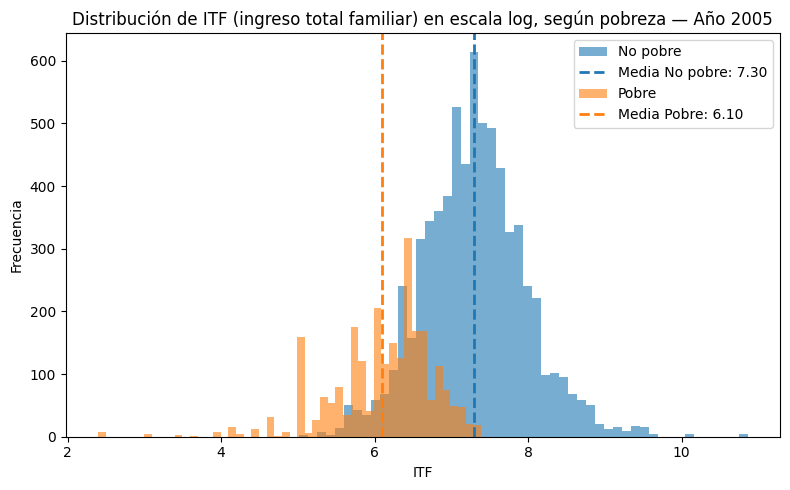

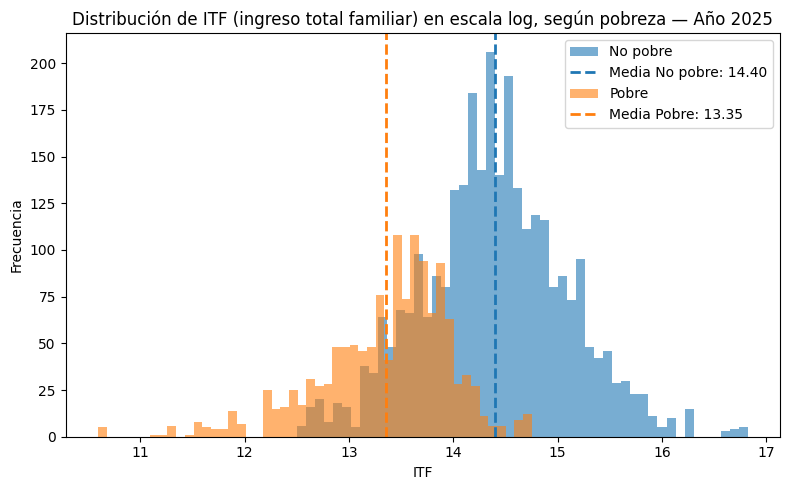

In [ ]:
# log-transform
respondieron_equiv["ITF_LOG"] = np.log1p(respondieron_equiv["ITF"]) # le aplicamos log para normalizar la escala

# diccionario de etiquetas y colores
labels = {0: "No pobre", 1: "Pobre"}
colors = {0: "tab:blue", 1: "tab:orange"}

years = [2005, 2025]

for year in years:
    dfy = respondieron_equiv.loc[respondieron_equiv["ANIO"] == year].copy()
    plt.figure(figsize=(8,5))

    for p in [0, 1]:
        g = dfy.loc[dfy["pobre"] == p, "ITF_LOG"].dropna()
        plt.hist(g, bins=50, alpha=0.6, label=labels[p], color=colors[p])
        if len(g):
            m = g.mean()
            plt.axvline(m, linestyle="--", linewidth=2, color=colors[p],
                        label=f"Media {labels[p]}: {m:.2f}")

    plt.title(f"Distribución de ITF (ingreso total familiar) en escala log, según pobreza — Año {year}")
    plt.xlabel("ITF")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()
